In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
pd.set_option('display.float_format', '{:.2f}'.format)
start_time = time.time()

# Import Model

In [14]:
models_path = os.path.join(os.getcwd(),'trained_models')
models = os.listdir(models_path)
for i, path in enumerate(models):
    print(f"{i}   {path}")

0   2024_10_07 17-55-55 Deep Neural Network 3oosRMSE
1   2024_10_08 00-00-41 Deep Neural Network 3oosRMSE
2   2024_10_08 00-24-59 Deep Neural Network 3oosRMSE
3   2024_10_08 00-42-22 Deep Neural Network 3oosRMSE
4   2024_10_09 09-01-43 Deep Neural Network 6oosRMSE
5   2024_10_09 09-08-27 Deep Neural Network 9oosRMSE
6   2024_10_09 09-11-43 Deep Neural Network 11oosRMSE
7   2024_10_09 10-09-20 Deep Neural Network 15oosRMSE
8   2024_10_09 11-11-13 Deep Neural Network 16oosRMSE


In [15]:
model = models[8]
model

'2024_10_09 11-11-13 Deep Neural Network 16oosRMSE'

In [16]:
model_path = os.path.join(models_path,model)

In [17]:
model_files = os.listdir(model_path)
model_files

['2024_10_09 11-11-13 Deep Neural Network 16oosRMSE insample.csv',
 '2024_10_09 11-11-13 Deep Neural Network 16oosRMSE outsample.csv',
 '2024_10_09 11-11-13 Deep Neural Network 16oosRMSE.pkl',
 '2024_10_09 11-11-13 Deep Neural Network 16oosRMSE.txt']

In [18]:
spec_path = os.path.join(model_path,[file for file in model_files if file.endswith('.txt')][0])

In [19]:
with open(spec_path, "r") as specs:
    for line in specs:
        print(line.strip())

Wed Oct  9 11:09:07 2024
spot(s):
[1214.91 1228.34 1235.03 1240.01 1244.81 1245.64 1251.98 1253.33 1253.75
1257.85 1259.82 1260.44 1260.47 1261.75 1263.07 1263.23 1267.3  1273.68
1274.24 1276.78 1276.84 1279.06 1279.51 1281.9  1283.57 1284.14 1285.13
1288.77 1293.41 1298.46 1304.46 1308.8  1311.13 1314.51 1314.81 1315.19
1317.94 1318.45 1320.45 1322.21 1322.24 1325.42 1325.9  1326.38 1326.79
1328.62 1329.65 1329.75 1330.53 1330.91 1331.14 1331.49 1333.24 1333.44
1333.8  1334.79 1335.63 1336.97 1337.24 1338.18 1338.73 1339.01 1340.15
1340.92 1342.48 1342.83 1348.8  1348.82 1348.83 1349.69 1349.91 1350.78
1351.52 1352.69 1353.69 1353.73 1354.63 1354.95 1358.24 1359.88 1360.
1360.03 1360.47 1360.48 1362.14 1363.84 1365.56 1365.65 1366.54 1367.41
1367.69 1369.22 1369.79 1370.68 1371.44 1372.41 1372.91 1374.2  1376.17
1376.18 1376.5  1377.07 1377.59 1377.99 1379.83 1380.11 1380.72 1380.79
1381.38 1385.23 1385.42 1385.74 1386.77 1386.98 1387.16 1388.04 1388.3
1388.63 1390.08 1390.45 1390.84 

In [20]:
model_path

'E:\\git\\machine-learning-option-pricing\\trained_models\\trained_models\\2024_10_09 11-11-13 Deep Neural Network 16oosRMSE'

In [21]:
model_files

['2024_10_09 11-11-13 Deep Neural Network 16oosRMSE insample.csv',
 '2024_10_09 11-11-13 Deep Neural Network 16oosRMSE outsample.csv',
 '2024_10_09 11-11-13 Deep Neural Network 16oosRMSE.pkl',
 '2024_10_09 11-11-13 Deep Neural Network 16oosRMSE.txt']

In [22]:
# insample_path = os.path.join(model_path,[file for file in model_files if file.find('insample') != -1][0])
# insample = pd.read_csv(insample_path).iloc[:,1:]
# insample

In [23]:
outsample_path = os.path.join(model_path,[file for file in model_files if file.find('outsample') != -1][0])
outsample = pd.read_csv(outsample_path).iloc[:,1:]
outsample

,spot_price,strike_price,barrier,days_to_maturity,barrier_price,updown,outin,w,barrier_type_name,rebate,...,kappa,rho,eta,v0,calculation_date,expiration_date,observed_price,outofsample_target,outofsample_prediction,outofsample_error
0,1260.39,1134.35,630.20,180,0.29,Down,In,put,DownIn,0.00,...,1.69,-1.00,0.15,0.04,2008-08-01,2009-01-28,0.66,0.66,0.24,-0.42
1,1260.39,1134.35,630.20,360,5.81,Down,In,put,DownIn,0.00,...,1.69,-1.00,0.15,0.04,2008-08-01,2009-07-27,5.98,5.98,8.43,2.45
2,1260.39,1134.35,630.20,540,16.96,Down,In,put,DownIn,0.00,...,1.69,-1.00,0.15,0.04,2008-08-01,2010-01-23,16.91,16.91,14.30,-2.60
3,1260.39,1134.35,630.20,720,29.92,Down,In,put,DownIn,0.00,...,1.69,-1.00,0.15,0.04,2008-08-01,2010-07-22,30.00,30.00,32.32,2.33
4,1260.39,1134.35,784.59,90,0.14,Down,In,put,DownIn,0.00,...,1.69,-1.00,0.15,0.04,2008-08-01,2008-10-30,0.33,0.33,-0.29,-0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315674,969.87,1066.86,1454.81,90,21.11,Up,In,call,UpIn,0.00,...,3.47,-1.00,0.31,0.30,2008-10-31,2009-01-29,21.15,21.15,91.85,70.70
315675,969.87,1066.86,1454.81,180,54.06,Up,In,call,UpIn,0.00,...,3.47,-1.00,0.31,0.30,2008-10-31,2009-04-29,53.80,53.80,123.18,69.37
315676,969.87,1066.86,1454.81,360,98.65,Up,In,call,UpIn,0.00,...,3.47,-1.00,0.31,0.30,2008-10-31,2009-10-26,98.79,98.79,174.31,75.52
315677,969.87,1066.86,1454.81,540,130.38,Up,In,call,UpIn,0.00,...,3.47,-1.00,0.31,0.30,2008-10-31,2010-04-24,130.28,130.28,213.92,83.64


# Train Model

In [24]:
# from train_main import model_fit, outsample, insample

# Test Model

In [25]:
maturities = outsample['days_to_maturity'].unique().tolist()
barrier_type_names = outsample['barrier_type_name'].unique().tolist()
ws = outsample['w'].unique().tolist()
print(f"\nmaturities:\n     maturities = {maturities}")
print(f"\ntypes:\n     barrier_type_names = {barrier_type_names}\n     ws = {ws}\n")


maturities:
     maturities = [180, 360, 540, 720, 90, 60]

types:
     barrier_type_names = ['DownIn', 'UpIn']
     ws = ['put', 'call']



In [26]:
by_wbt = outsample.copy().set_index(['w','barrier_type_name','days_to_maturity']).sort_index()

In [27]:
RMSE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    columns = barrier_type_names,
    index = maturities
)

for t in maturities:
    for b in barrier_type_names:
        RMSE.loc[t,b] = np.sqrt(np.average((by_wbt.loc[(slice(None), b, t),'outofsample_error'])**2))
print(f"\nRMSE:\n{RMSE}")


RMSE:
     DownIn  UpIn
180   15.50 13.41
360   16.40 15.04
540   16.75 16.33
720   17.87 18.29
90    16.75 13.83
60    18.02 15.27


In [28]:
MAE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    for b in barrier_type_names:
        MAE.loc[t,b] = np.average(np.abs(by_wbt.loc[(slice(None), b, t),'outofsample_error']))
print(f"\nMAE:\n{MAE}")


MAE:
     DownIn  UpIn
180    6.13  6.07
360    7.44  7.25
540    7.78  7.62
720    8.51  8.92
90     6.24  5.64
60     6.78  6.13


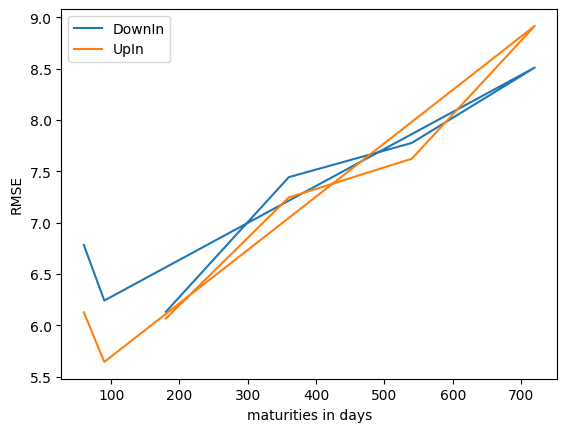

In [29]:
plt.figure()
for b in barrier_type_names:
    plt.plot(MAE.loc[:, b], label=b)
plt.xlabel('maturities in days')
plt.ylabel('RMSE')
plt.legend()
plt.show()
plt.close()

In [30]:
errors_bypayoff = {}
for w in ws:
    errors = {}
    print(
        f"\n         {'#'*(len(w)+5)}"
        f"\n         # {w}s #"
        f"\n         {'#'*(len(w)+5)}"
    )
    RMSE = pd.DataFrame(
        np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
        columns = barrier_type_names
        )
    RMSE[w] = maturities
    RMSE = RMSE.set_index(w,drop=True)
    for t in maturities:
        for b in barrier_type_names:
            RMSE.loc[t,b] = np.sqrt(np.average((by_wbt.loc[(w, b, t),'outofsample_error'])**2))
    print(f"RMSE:\n{RMSE}")
    errors['RMSE'] = RMSE
    


    MAE = pd.DataFrame(
        np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
        columns = barrier_type_names
    )
    MAE[w] = maturities
    MAE = MAE.set_index(w,drop=True)
    for t in maturities:
        for b in barrier_type_names:
            MAE.loc[t,b] = np.average(np.abs(by_wbt.loc[(w, b, t),'outofsample_error']))
    print(f"MAE:\n{MAE}")
    errors['MAE'] = MAE

    errors_bypayoff[w] = errors
    print("\n\n")


         ########
         # puts #
         ########
RMSE:
     DownIn  UpIn
put              
180   19.86  8.98
360   20.25  9.34
540   19.54  9.76
720   19.58 11.28
90    21.41  9.06
60    22.82 10.04
MAE:
     DownIn  UpIn
put              
180    9.06  3.08
360   10.62  3.62
540   10.36  4.08
720   10.69  4.95
90     9.12  2.97
60     9.74  3.51




         #########
         # calls #
         #########
RMSE:
      DownIn  UpIn
call              
180     9.03 16.73
360    11.31 19.11
540    13.40 20.93
720    15.97 23.28
90      9.06 17.44
60      9.82 19.12
MAE:
      DownIn  UpIn
call              
180     3.11  9.09
360     4.27 10.87
540     5.19 11.17
720     6.33 12.89
90      3.03  8.41
60      3.34  8.75





In [31]:
barrier_type_names

['DownIn', 'UpIn']

In [32]:
ws

['put', 'call']

In [33]:
for w, errors in errors_bypayoff.items():
    for b in barrier_type_names: 
        print(errors['MAE'])

     DownIn  UpIn
put              
180    9.06  3.08
360   10.62  3.62
540   10.36  4.08
720   10.69  4.95
90     9.12  2.97
60     9.74  3.51
     DownIn  UpIn
put              
180    9.06  3.08
360   10.62  3.62
540   10.36  4.08
720   10.69  4.95
90     9.12  2.97
60     9.74  3.51
      DownIn  UpIn
call              
180     3.11  9.09
360     4.27 10.87
540     5.19 11.17
720     6.33 12.89
90      3.03  8.41
60      3.34  8.75
      DownIn  UpIn
call              
180     3.11  9.09
360     4.27 10.87
540     5.19 11.17
720     6.33 12.89
90      3.03  8.41
60      3.34  8.75


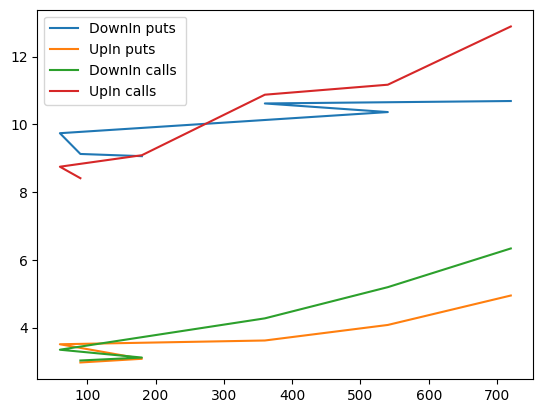

In [34]:
plt.figure()
for w, errors in errors_bypayoff.items():
    for b in barrier_type_names: 
        MAE = errors['MAE'][b]
        plt.plot(
            MAE.sort_values(), label=f"{b} {w}s ",
        )
plt.legend(loc='best')
plt.show()
plt.close()

In [35]:
end_time = time.time()
runtime = end_time - start_time
print(f"cpu: {runtime}")

cpu: 5.911518812179565
